In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [20]:
def plot_spec(qobj,w,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    if rlz is not None:
        skk, okk = local.load_spec(qobj,mb,rlz=None,cn=cn)
        vkk = np.std(skk,axis=0)
        print(Vkk/vkk)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)/w[4]*1e2,yerr=mb.bc**0.5*Vkk/w[4]*1e2,fmt='o')
    #for i in range(10):
    #    errorbar(mb.bc-i*5,mb.bc**0.5*(Skk[i]-Mkk)/w[4]*1e2,yerr=mb.bc**0.5*vkk/w[4]*1e2,fmt='o')
    errorbar(mb.bc+5,mb.bc**0.5*Mkk/w[4]*1e2,yerr=mb.bc**0.5*Vkk/w[4]*1e2,fmt='o')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e2,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [3]:
#qids = ['boss_01','boss_02','boss_03','boss_04']
qids = ['boss_02','boss_03','boss_04']
dirs = local.data_directory()
qobj, Qobj = {}, {}
for q in qids:
    aobj = local.init_analysis_params(qid='diff_'+q,ascale=3.,wtype='com15v3pt')
    qobj[q] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[q] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])
# combined
for wtype in ['iso15vcpt','iso15v3pt','com16v3pt','com15v3pt']:
    aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [4]:
w = {wtype: tools_cmb.get_wfactors(['diff_dn'],3.,wtype=wtype)['diff_dn'] for wtype in ['iso15vcpt','iso15v3pt','com16v3pt','com15v3pt']}

wfactors: [2.64551209e-02 4.43198474e-08 1.08375184e-13 2.89033159e-19
 8.10469432e-25]
wfactors: [2.64897241e-02 7.90728095e-07 3.63343224e-11 1.90522948e-15
 1.09009040e-19]
wfactors: [1.98779519e-02 1.17519756e-06 8.70375332e-11 6.86867112e-15
 5.62093631e-19]
wfactors: [4.51812113e-02 2.37444337e-06 1.58420014e-10 1.16220309e-14
 9.05749733e-19]


In [5]:
w0 = tools_cmb.get_wfactors(qids,3.)

wfactors: [4.65747638e-02 1.90091033e-06 8.88006409e-11 4.26664147e-15
 2.10180355e-19]
wfactors: [4.67007631e-02 2.96463524e-06 2.14690409e-10 1.58548493e-14
 1.18846837e-18]
wfactors: [4.74673400e-02 1.52910209e-06 5.72373897e-11 2.19044111e-15
 8.53323443e-20]


[1.00745883 0.99534121 1.00897216 1.0333261  0.97816643 0.95983904
 0.94261784 0.92136897 0.93836719 0.96387042 0.94111    0.88802347
 0.88951135 0.99928602 0.92667276 0.95741603 0.92475207 0.91577698
 0.77513186 0.82095538]
chi: 4.6 , chi (sim mean): 0.0 , chi (sim std): 5.8 , PTE: 0.56 
chi^2: 34.5 , chi^2 (sim): 25.3 , PTE: 0.17 
chi: 4.6 , chi (sim mean): 0.0 , chi (sim std): 5.8 , PTE: 0.56 
chi^2: 27.3 , chi^2 (sim): 25.3 , PTE: 0.36 


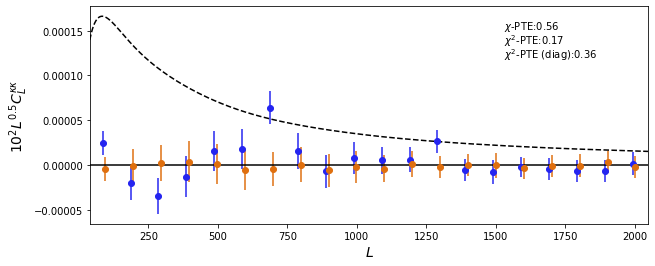

In [21]:
plot_spec(qobj['com16v3pt'],w['com16v3pt'],aobj.rlz,bnum=20)

In [ ]:
plot_spec(Qobj['com16v3'],w['com16v3'],aobj.rlz,cn=1)

In [ ]:
plot_spec(qobj['com15v3'],w['com15v3'],aobj.rlz[:64])

In [ ]:
plot_spec(Qobj['com15v3'],w['com15v3'])

In [ ]:
plot_spec(qobj['iso15dc'],w['iso15dc'])

In [ ]:
plot_spec(qobj['iso15v3'],w['iso15v3'])